###                                                                Exploratory Data Aalysis 

## About Dataset:
The data refers to State-wise, market-wise, variety-wise prices of Bhindi(Okra). It has the daily wholesale maximum
price, minimum price and modal price. This dataset is generated through the Portal which disseminates daily market information of various commodities.<br>

**state**   : States of India<br>
**district**: District os the states<br>
**market**  : market name in the district<br>
**commodity**:Bhindi(ladyfinger)<br>
**variety**  :Bhindi<br>
**arrival_date** :date of availablity of commodity in the market<br>
**min_price**    :Minimum price of Bhindi Rs./Quintal<br>
**max_price**    :Maximum price of Bhindi Rs./Quintal<br>
**modal_price**  :price at which bhindi is sold often in the markets Rs./Quintal<br>



** Loading the libraries and dataset**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [13]:
df = pd.read_csv("Bhindi.csv")

In [14]:
df.columns

Index(['state', 'district', 'market', 'commodity', 'variety', 'arrival_date',
       'min_price', 'max_price', 'modal_price'],
      dtype='object')

In [15]:
df.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,15/06/2018,80,100,90.0
1,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,06/07/2018,80,100,90.0
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,13/07/2018,80,100,90.0
3,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,16/07/2018,80,100,90.0
4,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,18/07/2018,80,100,90.0


In [16]:
type(df["commodity"])

pandas.core.series.Series

In [17]:
type(df['arrival_date'])

pandas.core.series.Series

For better understanding we will seggregate **"arrival_date"** variable and form 2 new variables which is **"year" and "month"**.we are doing this in order to identify the market trend of the Bhindi(lady finger) in different months and year.**but before that we should convert "arrival_date variable from object type to datatime type value"**

In [19]:
df['arrival_date'] = pd.to_datetime(df['arrival_date'] )

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68332 entries, 0 to 68331
Data columns (total 11 columns):
state           68332 non-null object
district        68332 non-null object
market          68332 non-null object
commodity       68332 non-null object
variety         68332 non-null object
arrival_date    68332 non-null datetime64[ns]
min_price       68332 non-null int64
max_price       68332 non-null int64
modal_price     68332 non-null float64
year            68332 non-null int64
month           68332 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 5.7+ MB


In [21]:
df['year'] = df['arrival_date'].dt.year

In [22]:
df['month'] = df['arrival_date'].dt.month

In [23]:
df['month'].head()

0    6
1    6
2    7
3    7
4    7
Name: month, dtype: int64

In [25]:
df.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,year,month
0,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,2018-06-15,80,100,90.0,2018,6
1,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,2018-06-07,80,100,90.0,2018,6
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,2018-07-13,80,100,90.0,2018,7
3,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,2018-07-16,80,100,90.0,2018,7
4,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,2018-07-18,80,100,90.0,2018,7


In [38]:
print(df["year"].value_counts(),df["month"].value_counts())

2018    68332
Name: year, dtype: int64 7     9063
8     8778
5     8558
6     7624
9     6890
4     6447
3     5656
2     4217
1     4054
12    2374
11    2359
10    2312
Name: month, dtype: int64


Lets start the analysis by asking some questions and see what dataset will answer.<br>
### 1. To check out Of the given districts, which district has the least modal_price of Bhindi? In which month?

In [28]:
df["modal_price"].min()

2.0

In [33]:
df[df['modal_price']==2]

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,year,month
22431,Kerala,Malappuram,Perinthalmanna,Bhindi(Ladies Finger),Bhindi,2018-03-27,2,2,2.0,2018,3
22432,Kerala,Malappuram,Perinthalmanna,Bhindi(Ladies Finger),Bhindi,2018-03-28,2,2,2.0,2018,3
50009,Punjab,Patiala,Ghanaur,Bhindi(Ladies Finger),Other,2018-12-07,0,2,2.0,2018,12


**summary :<br> 1.so here we see that the least modal price that is the price at which bhindi is sold very often is Rs. 2 per quintal i.e, Rs. 2 per 100 kg . reallyy....thats quite cheap <br> 2.Also, Patiala in Punjab and Malappuram in Kerela are the district where it is sold at cheap rates.<br> 3.but whats interesting to notice is .... the MONTHS in which there price is low is different ** *in March "Malappuram" district market has has low modal_price  and in DECEMBER "Patiala" market has it for low modal_price*

### 2.Lets check the min_price of Bhindi across all the states and visualize the top 5 states<br>
Using groupby, to find above 

In [39]:
min_across_states = df.groupby(['state'])['min_price'].min()
min_across_states.sort_values(ascending=True)[:6]

state
Uttar Pradesh    0
Punjab           0
Haryana          0
Maharashtra      0
Kerala           0
Tripura          2
Name: min_price, dtype: int64

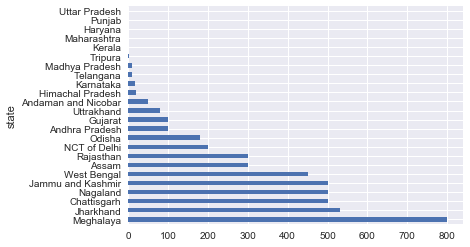

In [50]:
min_across_states.sort_values(ascending=False).plot.barh()

** Summary: <br> **this visualization shows that **Uttar Pradesh, Punjab ,Haryana, Maharashtra, Kerala ** are the top 5 state with min_price of 0 comapared with all other states.

### 3.Lets Find out the count of market across all the states.

In [74]:
market_accross_state = df.groupby(by="state")["market"].count()
market_accross_state.sort_values(ascending=False)

state
Punjab                 10367
Kerala                 10124
Uttar Pradesh           9898
Maharashtra             6672
Odisha                  6326
Haryana                 5748
Gujarat                 4021
Madhya Pradesh          2797
West Bengal             2044
Himachal Pradesh        1875
Karnataka               1594
Telangana               1563
Uttrakhand              1147
Rajasthan                900
Jharkhand                866
Tripura                  690
Jammu and Kashmir        580
NCT of Delhi             428
Chattisgarh              354
Assam                    160
Nagaland                  77
Andhra Pradesh            60
Meghalaya                 29
Andaman and Nicobar       12
Name: market, dtype: int64

**Summary : **<br> we can clearly see **Punjab,Kerela, UP ** winning the race with most number of markets in these states which trade in bhindi

Generate any insights using numerical attributes(min_price, max_price, modal_price) with
respect to month and visualize it.

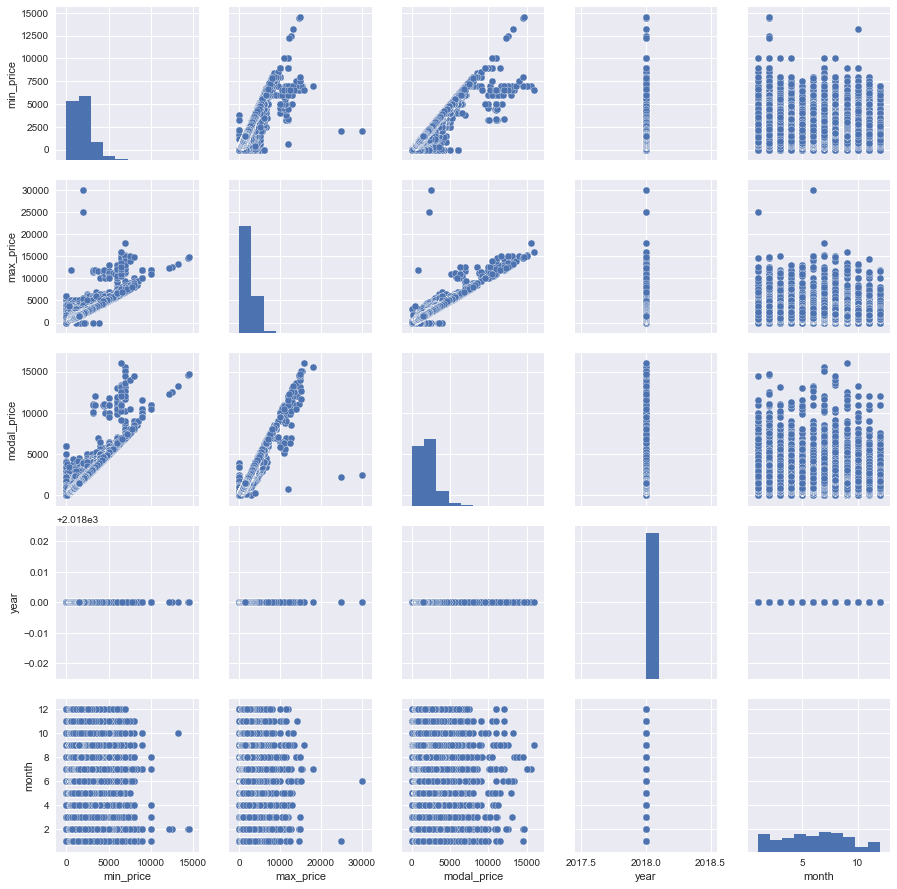

In [60]:
sns.pairplot(df)

### pairplot tells the trends of all numerical values with each other

1> max price and modal price , min_price are linearly dependant that is if one increase the other will increase as well which is obvious because it is derive from these values<br>


In [61]:
df.describe()

,min_price,max_price,modal_price,year,month
count,68332.000000,68332.000000,68332.000000,68332.0,68332.000000
mean,1836.866856,2293.391149,2081.912713,2018.0,6.102704
std,1076.426971,1234.760911,1141.787322,0.0,2.813692
min,0.000000,0.000000,2.000000,2018.0,1.000000
25%,1000.000000,1500.000000,1300.000000,2018.0,4.000000
50%,1600.000000,2000.000000,1850.000000,2018.0,6.000000
75%,2400.000000,3000.000000,2600.000000,2018.0,8.000000
max,14500.000000,30000.000000,16000.000000,2018.0,12.000000


** the above descrption of dataset tells that there is much variation in the data set which can be seen by paying attention to the values of mean ,std and median we can see the large std and also the mean and median values are bit far away from each other.**

### 4. Lets check the other variables according to months
using visualization for analysis

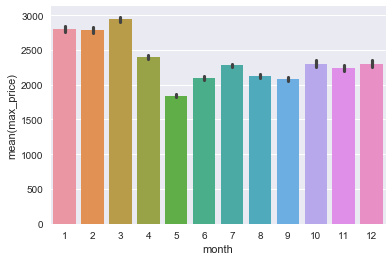

In [75]:
sns.barplot(x='month',y='max_price',data=df)

**with above we can see that the bhindis are sold costly in month of march and cheaply in the month of may, this may be because the sowing time for bhindi corps is in march and they can be harvetsed after 65 days of there sowing . but the fact that the sowing is done in march vary from region to region. Mostly warm condition are required for the groth of Bhindi corps.**

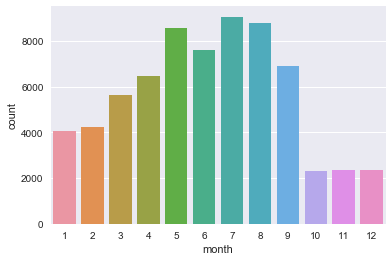

In [77]:
sns.countplot(x = "month",data = df)

** the above graph tell us that the Bhindis are available throughout the year in market but then its quantity increase and decrease as per the season** this may be due to the fact that Bhindis require long warm growing season and it can also be grown in high rainfall areas but it is susceptible to frost injury. and also the bhindi corps grows faster so that is why they need to be harvest and made available to market as soon as possible. and above graofh shows the similar story.

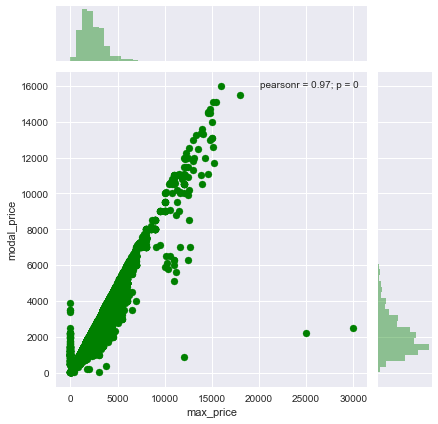

In [79]:
sns.jointplot(x = "max_price",y='modal_price', data = df, color = "green" )

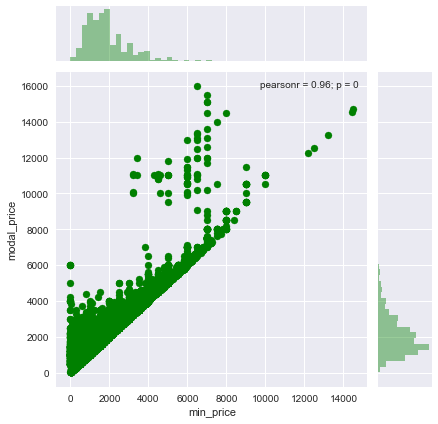

In [80]:
sns.jointplot(x = "min_price",y='modal_price', data = df, color = "green" )

** the modal_price is highly correlated with the min_pricr and max_price with pearson coefficient of 0.96**

In [82]:
df.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,year,month
0,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,2018-06-15,80,100,90.0,2018,6
1,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,2018-06-07,80,100,90.0,2018,6
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,2018-07-13,80,100,90.0,2018,7
3,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,2018-07-16,80,100,90.0,2018,7
4,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,2018-07-18,80,100,90.0,2018,7


#### we saw that punjab has most number of markets lets check which market sells more bhindis

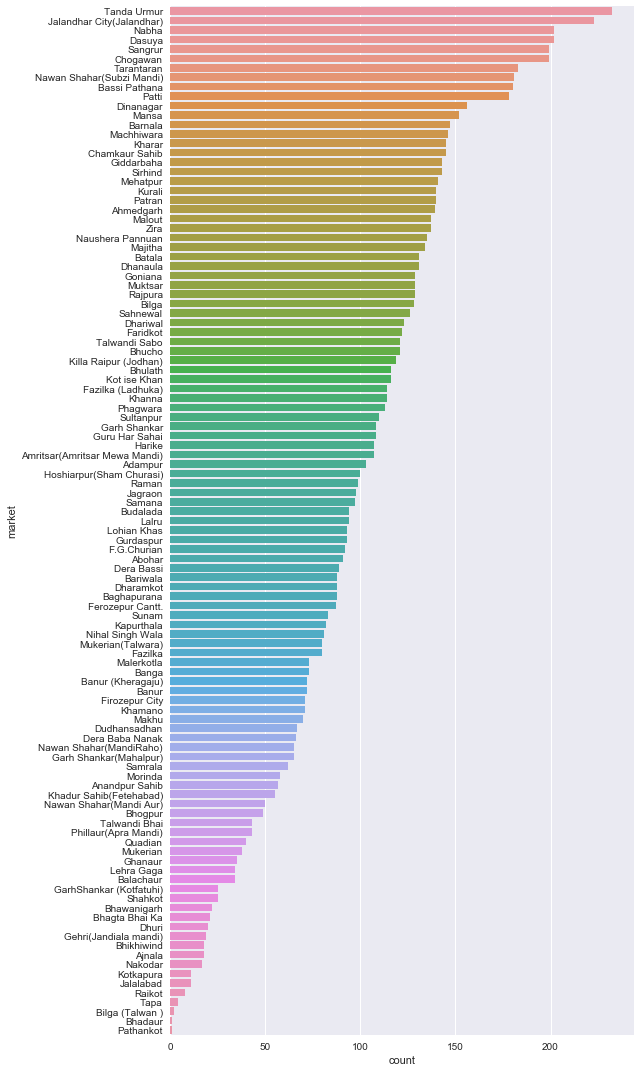

In [97]:
df_punjab = df[df['state']=="Punjab"]
df_punjab.head()
plt.figure(figsize=(9,15))
sns.countplot(y = 'market',data = df_punjab,order=df_punjab["market"].value_counts().index)
plt.tight_layout()

** the above graph shows the popular markets in state of punjab ** 

ref_link:
https://www.agrifarming.in/ladies-finger-farming/